<a href="https://colab.research.google.com/github/awarbler/CSE450AWF23/blob/main/M04PAbikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

predict the number of bike rentals for a given day and hour for their Washington DC branch.

https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv

https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes_december.csv

https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/biking_holdout_test_mini.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp_c : temperature in Celsius.
- feels_like_c: "Feels like" temperature in Celsius.
- hum: humidity percentage
- windspeed: Wind speed.
- casual: count of casual users
- registered: count of registered users


NO
year
mnth : month ( 1 to 12)

The data is not really a numerical data it is a category


bike_df['datetime']=pd.to_datetime(bike_df.datetime)

bike_df['season']=bike_df.season.astype('category')
bike_df['year']=bike_df.year.astype('category')
bike_df['month']=bike_df.month.astype('category')
bike_df['holiday']=bike_df.holiday.astype('category')
bike_df['weekday']=bike_df.weekday.astype('category')
bike_df['workingday']=bike_df.workingday.astype('category')
bike_df['weather_condition']=bike_df.weather_condition.astype('category')

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

In [ ]:
bikes.head(3)

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered
0,1/1/11,1,0,0,0,1,0.81,0,3.28,3.0014,3,13
1,1/1/11,1,1,0,0,1,0.80,0,2.34,1.9982,8,32
2,1/1/11,1,2,0,0,1,0.80,0,2.34,1.9982,5,27


In [ ]:
bikes.describe()

,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered
count,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000
mean,2.482058,11.547875,0.028671,0.684378,1.415580,0.624756,12.750436,15.723008,15.852141,36.471239,154.005770
std,1.085930,6.914199,0.166885,0.464777,0.637298,0.193227,8.168415,9.041349,11.322751,49.995203,151.319818
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-7.060000,-16.000000,0.000000,0.000000
25%,2.000000,6.000000,0.000000,0.000000,1.000000,0.470000,7.000000,7.980000,5.997800,4.000000,35.000000
50%,2.000000,12.000000,0.000000,1.000000,1.000000,0.620000,13.000000,16.440000,17.000000,17.000000,116.000000
75%,3.000000,18.000000,0.000000,1.000000,2.000000,0.780000,17.000000,23.020000,24.999200,50.000000,220.000000
max,4.000000,23.000000,1.000000,1.000000,4.000000,1.000000,57.000000,39.000000,50.000000,367.000000,886.000000


In [ ]:
# Import the libraries we need
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Commonly used modules
import numpy as np

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
# import cv2
# import IPython
# from six.moves import urllib

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# print(tf.__version__)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
bikes.info()
#no missig data or empty fields

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dteday        16637 non-null  object 
 1   season        16637 non-null  int64  
 2   hr            16637 non-null  int64  
 3   holiday       16637 non-null  int64  
 4   workingday    16637 non-null  int64  
 5   weathersit    16637 non-null  int64  
 6   hum           16637 non-null  float64
 7   windspeed     16637 non-null  int64  
 8   temp_c        16637 non-null  float64
 9   feels_like_c  16637 non-null  float64
 10  casual        16637 non-null  int64  
 11  registered    16637 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.5+ MB


In [ ]:
print(bikes.shape)
print(bikes.columns)

(16637, 12)
Index(['dteday', 'season', 'hr', 'holiday', 'workingday', 'weathersit', 'hum',
       'windspeed', 'temp_c', 'feels_like_c', 'casual', 'registered'],
      dtype='object')


In [ ]:
# no duplicates
# no empty columns
# Nan
bikes.isnull().sum()

dteday          0
season          0
hr              0
holiday         0
workingday      0
weathersit      0
hum             0
windspeed       0
temp_c          0
feels_like_c    0
casual          0
registered      0
dtype: int64

In [ ]:
bikes.isnull().values.any()

False

In [ ]:
bikes.describe(include='all')

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered
count,16637,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000
unique,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1/1/11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.482058,11.547875,0.028671,0.684378,1.415580,0.624756,12.750436,15.723008,15.852141,36.471239,154.005770
std,NaN,1.085930,6.914199,0.166885,0.464777,0.637298,0.193227,8.168415,9.041349,11.322751,49.995203,151.319818
min,NaN,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-7.060000,-16.000000,0.000000,0.000000
25%,NaN,2.000000,6.000000,0.000000,0.000000,1.000000,0.470000,7.000000,7.980000,5.997800,4.000000,35.000000
50%,NaN,2.000000,12.000000,0.000000,1.000000,1.000000,0.620000,13.000000,16.440000,17.000000,17.000000,116.000000
75%,NaN,3.000000,18.000000,0.000000,1.000000,2.000000,0.780000,17.000000,23.020000,24.999200,50.000000,220.000000


In [ ]:
bikes.nunique()

In [ ]:
print(bikes.duplicated().sum())
print(bikes.isna())

In [ ]:
bikes['holiday'].value_counts()

0    16160
1      477
Name: holiday, dtype: int64

In [ ]:
bikes['workingday'].value_counts()

1    11386
0     5251
Name: workingday, dtype: int64

In [ ]:
bikes['dteday'].value_counts()

1/1/11      24
4/16/12     24
4/7/12      24
4/8/12      24
4/9/12      24
            ..
1/26/11     16
1/18/11     12
10/30/12    11
1/27/11      8
10/29/12     1
Name: dteday, Length: 700, dtype: int64

In [ ]:
# https://medium.com/shecodeafrica/predicting-house-prices-gradientboostingregressor-algorithm-ec9d381b0ebc
corr_matrix = bikes.corr()
top_correlated_features = corr_matrix.index
corr_matrix["casual"].sort_values(ascending = False)

<ipython-input-52-9b3fdb5a477c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = bikes.corr()


casual          1.000000
registered      0.511319
temp_c          0.455669
feels_like_c    0.450084
hr              0.304632
season          0.128405
windspeed       0.093039
holiday         0.032580
weathersit     -0.149897
workingday     -0.307590
hum            -0.348801
Name: casual, dtype: float64

In [ ]:
bikes['count']= bikes['casual'] + bikes['registered']

In [ ]:
# https://medium.com/shecodeafrica/predicting-house-prices-gradientboostingregressor-algorithm-ec9d381b0ebc
corr_matrix = bikes.corr()
top_correlated_features = corr_matrix.index
corr_matrix["count"].sort_values(ascending = False)

<ipython-input-55-87af43921c23>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = bikes.corr()


count           1.000000
registered      0.971744
casual          0.699721
temp_c          0.409245
feels_like_c    0.404820
hr              0.396945
season          0.170228
windspeed       0.097011
workingday      0.024935
holiday        -0.026586
weathersit     -0.140111
hum            -0.327288
Name: count, dtype: float64

In [ ]:
bikes.info()
bikes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dteday        16637 non-null  object 
 1   season        16637 non-null  int64  
 2   hr            16637 non-null  int64  
 3   holiday       16637 non-null  int64  
 4   workingday    16637 non-null  int64  
 5   weathersit    16637 non-null  int64  
 6   hum           16637 non-null  float64
 7   windspeed     16637 non-null  int64  
 8   temp_c        16637 non-null  float64
 9   feels_like_c  16637 non-null  float64
 10  casual        16637 non-null  int64  
 11  registered    16637 non-null  int64  
 12  count         16637 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1.7+ MB


,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered,count
0,1/1/11,1,0,0,0,1,0.81,0,3.28,3.0014,3,13,16
1,1/1/11,1,1,0,0,1,0.80,0,2.34,1.9982,8,32,40
2,1/1/11,1,2,0,0,1,0.80,0,2.34,1.9982,5,27,32
3,1/1/11,1,3,0,0,1,0.75,0,3.28,3.0014,3,10,13
4,1/1/11,1,4,0,0,1,0.75,0,3.28,3.0014,0,1,1


In [ ]:
# https://medium.com/shecodeafrica/predicting-house-prices-gradientboostingregressor-algorithm-ec9d381b0ebc
corr_matrix = bikes.corr()
top_correlated_features = corr_matrix.index
corr_matrix["count"].sort_values(ascending = False)

<ipython-input-95-87af43921c23>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = bikes.corr()


count           1.000000
registered      0.971744
casual          0.699721
temp_c          0.409245
feels_like_c    0.404820
hr              0.396945
hr_17           0.316128
hr_18           0.274732
hr_8            0.193429
season          0.170228
season_3        0.152247
hr_19           0.143067
hr_16           0.140503
weathersit_1    0.116073
windspeed       0.097011
hr_13           0.072970
hr_12           0.072483
hr_15           0.069868
season_2        0.058942
hr_14           0.058291
hr_20           0.043966
hr_9            0.033484
hr_7            0.025925
workingday_1    0.024935
workingday      0.024935
hr_11           0.020858
season_4        0.018836
weathersit_4   -0.008569
hr_10          -0.018301
hr_21          -0.018698
workingday_0   -0.024935
holiday        -0.026586
weathersit_2   -0.046762
hr_22          -0.065994
hr_23          -0.116911
weathersit_3   -0.125693
hr_6           -0.130699
weathersit     -0.140111
hr_0           -0.156199
hr_1           -0.179864


In [ ]:
dummy_fields = ['season', 'weathersit', 'hr','']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Data columns (total 43 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        16637 non-null  int64  
 1   hr            16637 non-null  int64  
 2   holiday       16637 non-null  int64  
 3   workingday    16637 non-null  int64  
 4   weathersit    16637 non-null  int64  
 5   hum           16637 non-null  float64
 6   windspeed     16637 non-null  int64  
 7   temp_c        16637 non-null  float64
 8   feels_like_c  16637 non-null  float64
 9   season_1      16637 non-null  uint8  
 10  season_2      16637 non-null  uint8  
 11  season_3      16637 non-null  uint8  
 12  season_4      16637 non-null  uint8  
 13  weathersit_1  16637 non-null  uint8  
 14  weathersit_2  16637 non-null  uint8  
 15  weathersit_3  16637 non-null  uint8  
 16  weathersit_4  16637 non-null  uint8  
 17  hr_0          16637 non-null  uint8  
 18  hr_1          16637 non-nu

In [ ]:
# dummy variables
dummy_fields = ['season', 'weathersit', 'hr', 'workingday']
for each in dummy_fields:
    dummies = pd.get_dummies(bikes[each], prefix=each, drop_first=False)
    bikes = pd.concat([bikes, dummies], axis=1)
bikes.head()

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,...,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,workingday_0,workingday_1
0,1/1/11,1,0,0,0,1,0.81,0,3.28,3.0014,...,0,0,0,0,0,0,0,0,1,0
1,1/1/11,1,1,0,0,1,0.80,0,2.34,1.9982,...,0,0,0,0,0,0,0,0,1,0
2,1/1/11,1,2,0,0,1,0.80,0,2.34,1.9982,...,0,0,0,0,0,0,0,0,1,0
3,1/1/11,1,3,0,0,1,0.75,0,3.28,3.0014,...,0,0,0,0,0,0,0,0,1,0
4,1/1/11,1,4,0,0,1,0.75,0,3.28,3.0014,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Brother Flores Study Session
# drop registered and casual
X = bikes.drop(columns=['registered','casual','count','dteday'])
y = bikes['count']

In [ ]:
# Get our target variable and features and split them into test and train datasets
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# fit scaler on training data
#MinMax scales data between 0 and 1
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing data
X_test = norm.transform(X_test)
X_train


array([[0.66666667, 0.13043478, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.60869565, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.33333333, 0.56521739, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.34782609, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.86956522, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.33333333, 0.52173913, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Data columns (total 77 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        16637 non-null  int64  
 1   hr            16637 non-null  int64  
 2   holiday       16637 non-null  int64  
 3   workingday    16637 non-null  int64  
 4   weathersit    16637 non-null  int64  
 5   hum           16637 non-null  float64
 6   windspeed     16637 non-null  int64  
 7   temp_c        16637 non-null  float64
 8   feels_like_c  16637 non-null  float64
 9   season_1      16637 non-null  uint8  
 10  season_2      16637 non-null  uint8  
 11  season_3      16637 non-null  uint8  
 12  season_4      16637 non-null  uint8  
 13  weathersit_1  16637 non-null  uint8  
 14  weathersit_2  16637 non-null  uint8  
 15  weathersit_3  16637 non-null  uint8  
 16  weathersit_4  16637 non-null  uint8  
 17  hr_0          16637 non-null  uint8  
 18  hr_1          16637 non-nu

In [ ]:
# build a neural network using a sequential model
# input layer node size is the same as the training columns
# hidden layers: 128 node layer, 256 node layer, 64 node layer
# hidden layer has a dropout technique applied to prevent overfitting. When the Dropout() is applied, randomly selected neurons are ignored during training. The probability of droping nuerons is the parameter.
# Dropout info: https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/
# a single node output layer
"""
Output Layer:
regression - single neuron
binary classification - single neuron
multi-class classification - Multiple neurons, one for each class."""

model = Sequential()
model.add(Dense(128, input_dim=len(X_train[0]), activation='sigmoid'))
model.add(Dropout(.5))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))

model.add(Dense(1, activation='relu'))

In [ ]:
# Display model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               9984      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               33024     
                                                                 
 dense_10 (Dense)            (None, 64)                16448     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 59521 (232.50 KB)
Trainable params: 59521 (232.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the NN model
# Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
# Optimizer — This is how the model is updated based on the data it sees and its loss function.
# Metrics — Used to monitor the training and testing steps. The following example uses MSE.
model.compile(loss="mean_squared_error", optimizer="adam", metrics=['mse'])

In [ ]:
# Configuration provided to the model to stop training if certain metric doesn't improve after a certain number of epochs.
early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=30)
# Train the model with training data
# epoch - Indicates the number of passes of the entire training dataset.
# validation_split - spliting the training data for validation
# batch_size - the size of each batch used to train the NN
# callbacks - the configuration to stop training if certain metrics don't improve.
# shuffle - whether to shuffle the data before each epoch
history = model.fit(X_train, y_train, epochs=2000, validation_split=.35, batch_size=20, callbacks=[early_stop],shuffle=False)
# See how the NN improves with each pass
hist = pd.DataFrame(history.history)

Epoch 1/2000
163/163 [==============================] - 2s 4ms/step - loss: 63807.2148 - mse: 63807.2148 - val_loss: 65828.8125 - val_mse: 65828.8125
Epoch 2/2000
163/163 [==============================] - 1s 5ms/step - loss: 61644.8281 - mse: 61644.8281 - val_loss: 63810.5078 - val_mse: 63810.5078
Epoch 3/2000
163/163 [==============================] - 1s 5ms/step - loss: 59660.4062 - mse: 59660.4062 - val_loss: 61781.9961 - val_mse: 61781.9961
Epoch 4/2000
163/163 [==============================] - 1s 3ms/step - loss: 57765.8555 - mse: 57765.8555 - val_loss: 59911.9375 - val_mse: 59911.9375
Epoch 5/2000
163/163 [==============================] - 1s 3ms/step - loss: 55994.2773 - mse: 55994.2773 - val_loss: 58147.6016 - val_mse: 58147.6016
Epoch 6/2000
163/163 [==============================] - 1s 3ms/step - loss: 54320.7461 - mse: 54320.7461 - val_loss: 56477.0117 - val_mse: 56477.0117
Epoch 7/2000
163/163 [==============================] - 1s 3ms/step - loss: 52736.5977 - mse: 52736.

In [ ]:
# View history in a df
hist.head()

NameError: ignored

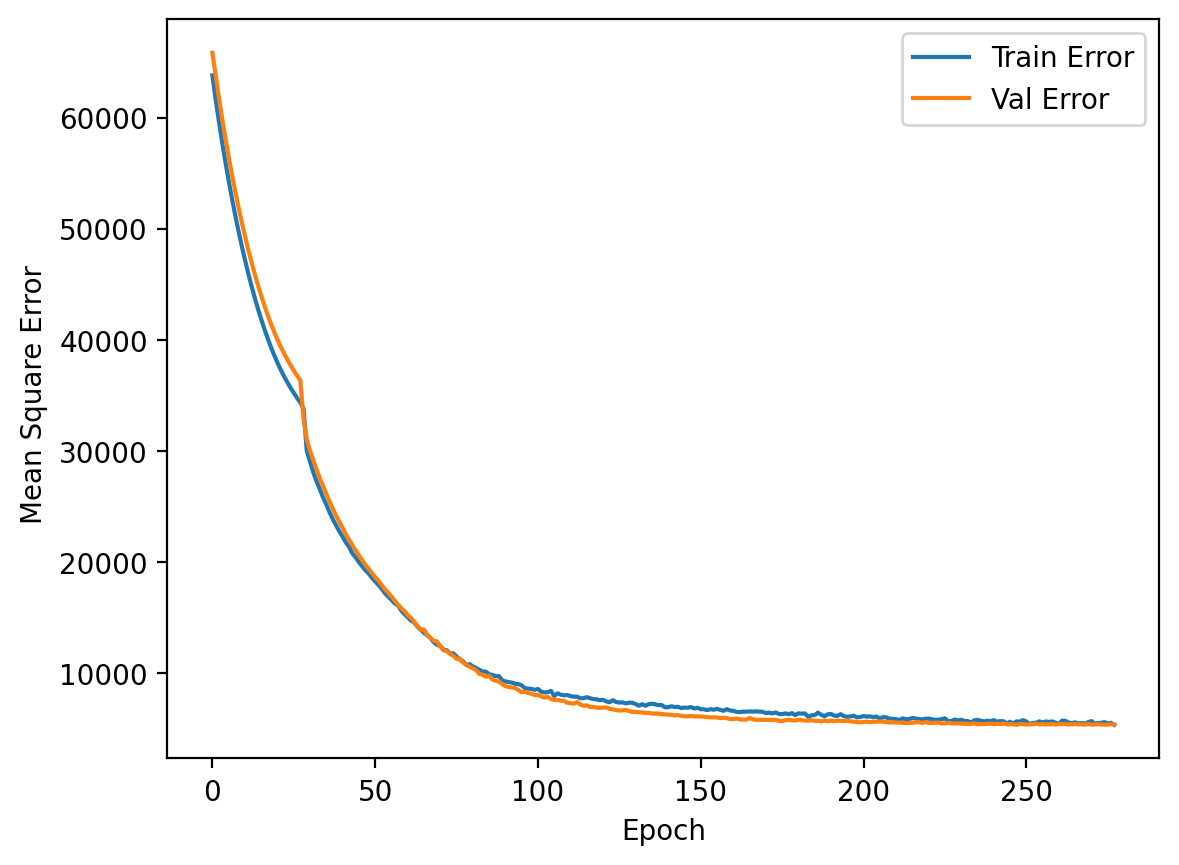

In [ ]:
# plot history
hist = hist.reset_index()
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error ')
plt.plot(hist['index'], hist['mse'], label='Train Error')
plt.plot(hist['index'], hist['val_mse'], label = 'Val Error')
plt.legend()

In [ ]:
# Make predictions
predictions = np.round(model.predict(X_test),1)

364/364 [==============================] - 1s 2ms/step


In [ ]:
# View the RMSE
result = mean_squared_error(y_test, predictions, squared=False)
result

80.05975699220693

In [ ]:
# View r2 score
r2 = r2_score(y_test,predictions)
r2

0.8082460098587273